# Invasive Species Data & EDA


1. Data Provenance 

    a. Where is the data from?
        Global invasive species dataset: IUCN
        https://www.gbif.org/dataset/b351a324-77c4-41c9-a909-f30f77268bc4 

    b. Is it reliable? (partially subjective)
        Somewhat. supported by GBIF
    
    
2. Time measures

    a. Time range of the dataset
        NA
    
    b. Granularity (Weekly, Monthly, Aperiodic, Daily, Timestamp)
        NA
    
    
3. Location

    a. Is it available for the UK, Brazil/India?
        number of rows:
        IND    519
        GBR    437
        BRA    388
    
    b. Granularity (is it a pin point location?, Rounded coordinates?...)
        Country code
    
    c. Format (shape files, lat long, geographical code)
        Country code
    
    
4. Data Gaps and size

    a. Size of the data
        1344 x 7 dataframe 
    
    b. Available columns and columns of interest
        'id', 'countryCode', 'establishmentMeans', 'invasiveness', 'pathway',
       'taxonID', 'scientificName'
           *we need to pick 'invasiveness' = 'Invasive'
    
    c. Missing data (amount and years/locations missing)
        just a list of invasive species. dataset not updated frequently
    
    d. Nulls or Nans
        some pathways and taxonIDs are null.
    
    e. Primary key
        (id, countryCode, pathway)
    
    f. Columns to join on
        id (same as taxon_id)
    
    g. Any additional fields/terms
        definition of invasive/native/..: https://rs.gbif.org/sandbox/vocabulary/issg/status.xml
        https://rs.gbif.org/sandbox/vocabulary/issg/invasiveness.xml
        https://rs.gbif.org/sandbox/vocabulary/issg/pathway.xml
    
    
5. Ease of access

    a. Is there a free to use license?
        Yes, open license
    
    b. How is data accessed? (API, download)
         Downloaded csv file
    
    c. Is the documentation straightforward?
        Yes, just have to joing multiple files
    
    d. Any limits on how much data we can download?
         No



In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df_inv = pd.read_csv('../data/invasive_species.csv')
df_inv.head()

,id,countryCode,establishmentMeans,invasiveness,pathway,taxonID,scientificName
0,2,BRA,Native,NotInvasive,BotanicalGardenZooAquaria,2.0,Miconia calvescens D.C.
1,2,BRA,Native,NotInvasive,TransportationOfHabitatMaterial,2.0,Miconia calvescens D.C.
2,2,BRA,Native,NotInvasive,MachineryEquipment,2.0,Miconia calvescens D.C.
3,2,GBR,Alien,Unspecified,BotanicalGardenZooAquaria,2.0,Miconia calvescens D.C.
4,2,GBR,Alien,Unspecified,TransportationOfHabitatMaterial,2.0,Miconia calvescens D.C.


<AxesSubplot:xlabel='countryCode'>

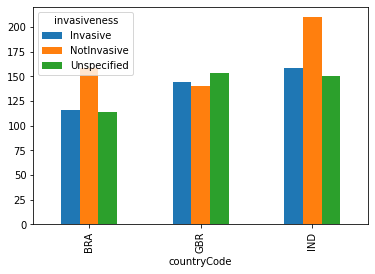

In [56]:
df = df_inv.groupby(['countryCode','invasiveness']).id.count().reset_index()

df.pivot('countryCode', 'invasiveness', "id").plot(kind='bar')